
#  Análisis Predictivo de Incendios Forestales 

###  Resumen 

Este análisis tiene como objetivo utilizar datos meteorológicos para predecir la ocurrencia de incendios forestales. 

¿Qué hago exactamente?

En principio realizo un analisis exploratorio de los datos Y visualizo su distribución y observo cómo se comportan las variables. Utilizo herramintas de estadística descriptiva como: histograma de clase, boxplot, análisis de frecuencia. Posteriormente, hago inferencia estadística al realizar pruebas de correlación para decidir si la ocurrencia de dos variables concluyen en la presencia de la variable respuesta incendio.

Luego, empleo modelos de machine learning para interpretar qué factores, entre todos los presentes del dataset, influyen sobre la variable respuesta que en este caso es un evento de incendio forestal. 

Finalmente, utilizo la librería Scikit-learn, para predecir la aparición del evento incendio.


**Dataset**: Datos climáticos del Parque Nacional Montesinho (Portugal).

**Objetivos**:
- Entender el comportamiento de variables meteorológicas asociadas a incendios.
- Construir un modelo predictivo que clasifique días con riesgo de incendio.
- Evaluar el desempeño de los modelos con métricas estándar.

**Principales hallazgos**:
- La temperatura y humedad relativa son las variables más asociadas a la ocurrencia de incendios.
- Los modelos Random Forest y Regresión Logística ofrecen una capacipad predictiva con una accuracy levemente superior al azar (50-55% de acurracy).

---


### Predicción de incendios forestales con datos climáticos

### 1. Introducción

Este análisis tiene como objetivo explorar un conjunto de datos de condiciones meteorológicas para predecir la ocurrencia de incendios forestales. Acá usaré técnicas de machine learning para construir modelos predictivos y evaluar su rendimiento.

### 2. Dataset utilizado

- Fuente: [UCI Machine Learning Repository – Forest Fires Dataset](https://archive.ics.uci.edu/ml/datasets/Forest+Fires)
- Variables: temperatura, humedad, viento, lluvia, entre otras.
- Variable objetivo: `fire` (binaria: 1 si hubo incendio, 0 si no).

---

### 3. Carga y visualización de datos

In [18]:
import pandas as pd

df = pd.read_csv("forestfires.csv")
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


### 4. Importo dependencias

In [19]:
import pandas 
import matplotlib
import seaborn
import sklearn

### 5. Analisis exploratorio
- Info general del dataset
- Distribución de variables numéricas
- Boxplots por clase (fire)
- Matriz de correlación
- Conteo de incendios por mes

Info general del dataset

Estadistica descriptiva:

In [20]:
df.describe()

# Reviso las columnas categoricas:
# el dataset tiene columnas "month" y "day" que son texto. Quiero ver sus  valores

print("Meses:", df['month'].unique())
print("Días:", df['day'].unique())

Meses: ['mar' 'oct' 'aug' 'sep' 'apr' 'jun' 'jul' 'feb' 'jan' 'dec' 'may' 'nov']
Días: ['fri' 'tue' 'sat' 'sun' 'mon' 'wed' 'thu']


A. Distribución de variables numéricas

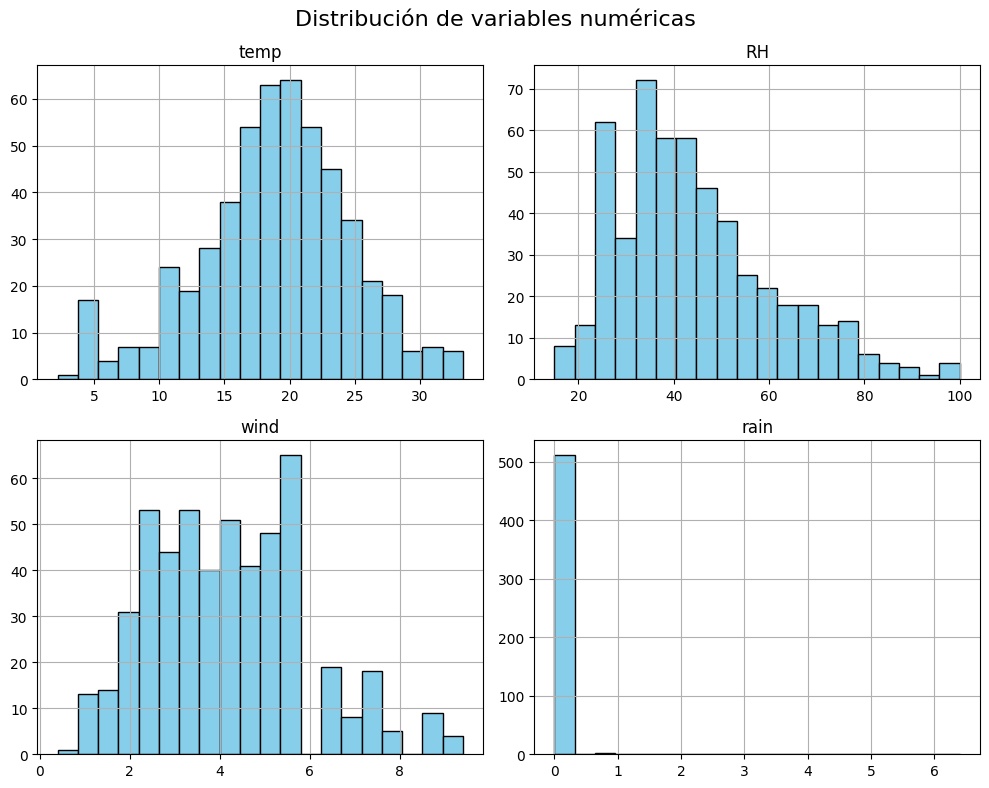

In [21]:
import matplotlib.pyplot as plt

df[['temp', 'RH', 'wind', 'rain']].hist(bins=20, figsize=(10, 8), color='skyblue', edgecolor='black')
plt.suptitle("Distribución de variables numéricas", fontsize=16)
plt.tight_layout()
plt.show()

B. Boxplots por clase (fire)

Acá verifico el nombre de las columnas porque sospecho que la clase "fire" no existe en el data frame.

In [22]:
print(df.columns)

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')


Acá veo que mi dataframe no tiene una columna que se llama "fire". 

¿qué hago?

me interesa usar como clase (o variable objeto) la variable área, que en realidad indica, el tamaño en área correspondiente a incendios forestales. 

In [23]:
df['fire'] = df['area'] > 0

Ahora ya creé la columna "fire" que será true si hubo incendio (área>0) y false en caso contrario.

C:\Users\flore\AppData\Local\Temp\ipykernel_13000\806449466.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='fire', y='temp', data=df, ax=axes[0,0], palette='Set2')
C:\Users\flore\AppData\Local\Temp\ipykernel_13000\806449466.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='fire', y='RH', data=df, ax=axes[0,1], palette='Set2')
C:\Users\flore\AppData\Local\Temp\ipykernel_13000\806449466.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='fire', y='wind', data=df, ax=axes[1,0], palette='Set2')
C:\Users\flore\AppData\Local\Temp\i

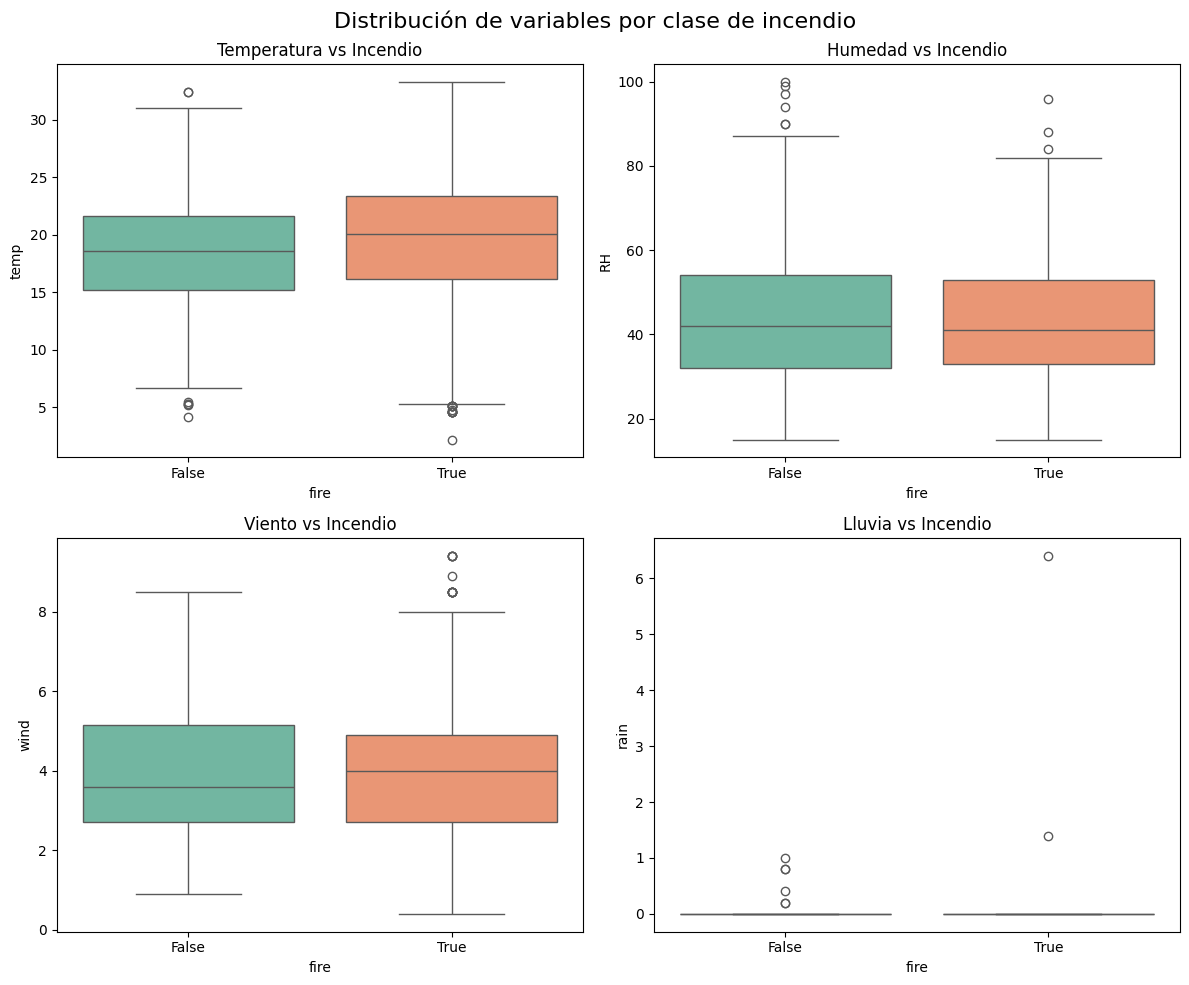

In [24]:
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.boxplot(x='fire', y='temp', data=df, ax=axes[0,0], palette='Set2')
axes[0,0].set_title("Temperatura vs Incendio")

sns.boxplot(x='fire', y='RH', data=df, ax=axes[0,1], palette='Set2')
axes[0,1].set_title("Humedad vs Incendio")

sns.boxplot(x='fire', y='wind', data=df, ax=axes[1,0], palette='Set2')
axes[1,0].set_title("Viento vs Incendio")

sns.boxplot(x='fire', y='rain', data=df, ax=axes[1,1], palette='Set2')
axes[1,1].set_title("Lluvia vs Incendio")

fig.suptitle("Distribución de variables por clase de incendio", fontsize=16)
plt.tight_layout()
plt.show()

C. Matriz de correlación

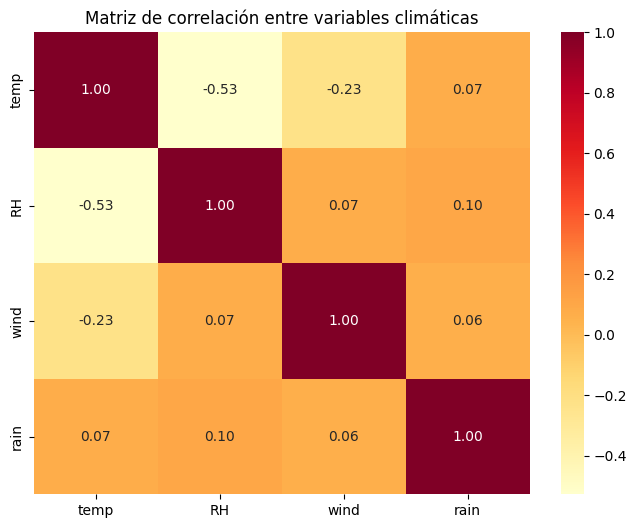

In [25]:
corr = df[['temp', 'RH', 'wind', 'rain']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="YlOrRd", fmt=".2f")
plt.title("Matriz de correlación entre variables climáticas")
plt.show()

D. Conteo de incendios por mes

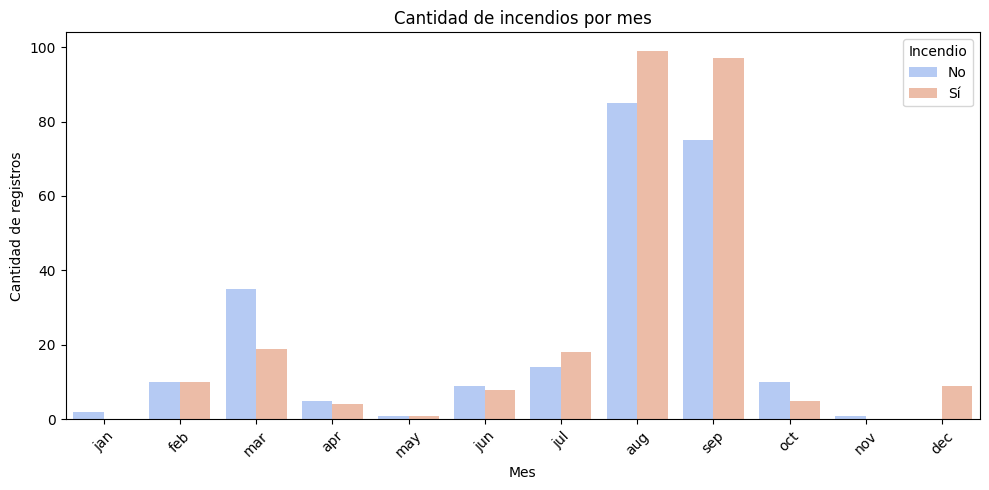

In [26]:
if 'month' in df.columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x='month', hue='fire',
                  order=['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'],
                  palette='coolwarm')
    plt.title("Cantidad de incendios por mes")
    plt.xlabel("Mes")
    plt.ylabel("Cantidad de registros")
    plt.xticks(rotation=45)
    plt.legend(title="Incendio", labels=["No", "Sí"])
    plt.tight_layout()
    plt.show()

### 6. Visualizacion
Ploteo variables para analizar la distribucion de datos: ayuda a detectar
outliers, anomalias, sesgos y relaciones entre variables.abs

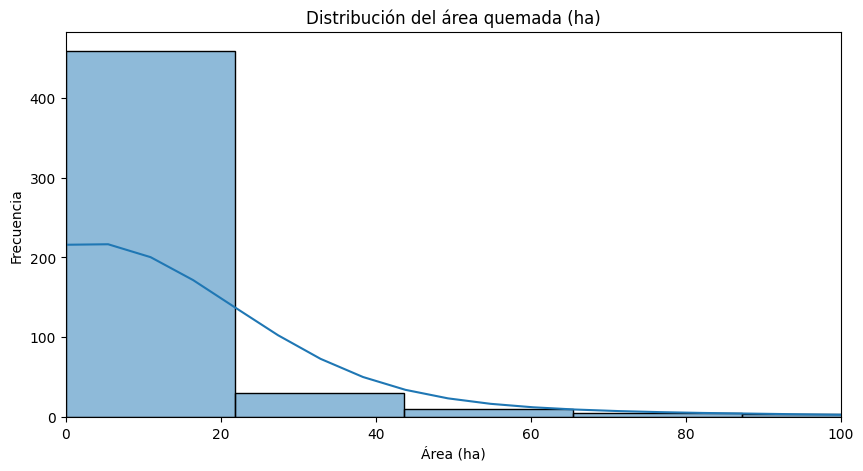

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tamaño del área quemada
plt.figure(figsize=(10, 5))
sns.histplot(df['area'], bins=50, kde=True)
plt.title("Distribución del área quemada (ha)")
plt.xlabel("Área (ha)")
plt.ylabel("Frecuencia")
plt.xlim(0, 100)  # limitamos el eje X para evitar distorsión por outliers extremos
plt.show()


### 7. Preprocesamiento
- Limpieza de datos

- Conversión de variables categóricas

- Creación de variable binaria fire

- División entre set de entrenamiento y prueba

In [28]:
### CONVERSION DE VARIABLE CATEGORICAS 
"""
onvierto las columnas que estan en texto "month" y "day" en variables numericas (dummies)
creo una variable binaria (fire=1 si area>1; fire=0 si area <1)

""" 

# Mapear meses a números
month_map = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4,
    'may': 5, 'jun': 6, 'jul': 7, 'aug': 8,
    'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}

day_map = {
    'mon': 1, 'tue': 2, 'wed': 3,
    'thu': 4, 'fri': 5, 'sat': 6, 'sun': 7
}

# Aplicar los mapeos
df['month'] = df['month'].map(month_map)
df['day'] = df['day'].map(day_map)

# Verificar resultado
df[['month', 'day']].head()


,month,day
0,3,5
1,10,2
2,10,6
3,3,5
4,3,7


In [29]:
### CREO VARIABLE CATEGORICA FIRE
"""
Esto será útil para hacer clasificación más adelante (modelo predictivo).

Vamos a definir una variable fire:

    fire = 1 si el área quemada es mayor a 1 hectaria
    fire = 0 si no
"""

# Crear variable objetivo
df['fire'] = df['area'].apply(lambda x: 1 if x > 1 else 0)

# Ver distribución de clases
df['fire'].value_counts()


fire
0    274
1    243
Name: count, dtype: int64

In [30]:
### VERIFICO EL DATASET FINAL

# Mostrar las primeras filas del dataset transformado
df.head()

# Verificar tipos de datos
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    int64  
 3   day     517 non-null    int64  
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
 13  fire    517 non-null    int64  
dtypes: float64(8), int64(6)
memory usage: 56.7 KB


In [31]:
### MODELADO PREDICTIVO DE DATOS
"""
    construyo un modelo de clasificacion (p.e. regresion logistica, 
    arbol de decision) para predecir si habra incendio (fire=1) o no.
    
"""
    
## PREPARO LOS DATOS PARA EL ENTRENAMIENTO

"""
    1. defino variables predictivas (x) y variable objeto (y)
    
    --> quiero predecir "fire" usando las otras variables numericas, 
    excepto area (porque es el resultado que define "fire")
 
"""
# Variables predictoras (excluimos 'area' y 'fire' de las features)
X = df.drop(columns=['area', 'fire'])

# Variable objetivo
y = df['fire']


In [32]:
### DIVIDO EL SET DE DATOS ENTRE ENTRENAMIENTO Y PRUEBA

from sklearn.model_selection import train_test_split

# División 70% entrenamiento, 30% prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)


### 8. Modelado
🔹 Regresión logística
- Entrenamiento del modelo
- Predicción del test

🔹 Árbol de Decisión
- Entrenamiento y predicción
- Métricas de rendimiento

Pruebo modelos más potentes: Random Forest y XGBoost

🔹 Random Forest con búsqueda de hiperparámetros (GridSearchCV)
- Combinaciones probadas
- Mejor modelo encontrado
- Resultados
- Optimización y mejoramiento de Random Forest con GridSearchCV

🔹 XGBoost
- Configuración y resultados

#### Modelo 1. Regresión logística

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Crear y entrenar modelo
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Predecir en test
y_pred_logreg = logreg.predict(X_test)

# Resultados
print("Reporte de clasificación - Regresión Logística:")
print(classification_report(y_test, y_pred_logreg))

print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred_logreg))


Reporte de clasificación - Regresión Logística:
              precision    recall  f1-score   support

           0       0.53      0.67      0.59        83
           1       0.46      0.32      0.37        73

    accuracy                           0.51       156
   macro avg       0.49      0.49      0.48       156
weighted avg       0.50      0.51      0.49       156

Matriz de confusión:
[[56 27]
 [50 23]]


C:\Users\flore\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


####  Modelo 2. Árbol de decisión

Reporte de clasificación - Árbol de Decisión:
              precision    recall  f1-score   support

           0       0.57      0.64      0.60        83
           1       0.52      0.45      0.49        73

    accuracy                           0.55       156
   macro avg       0.55      0.55      0.54       156
weighted avg       0.55      0.55      0.55       156

Matriz de confusión:
[[53 30]
 [40 33]]


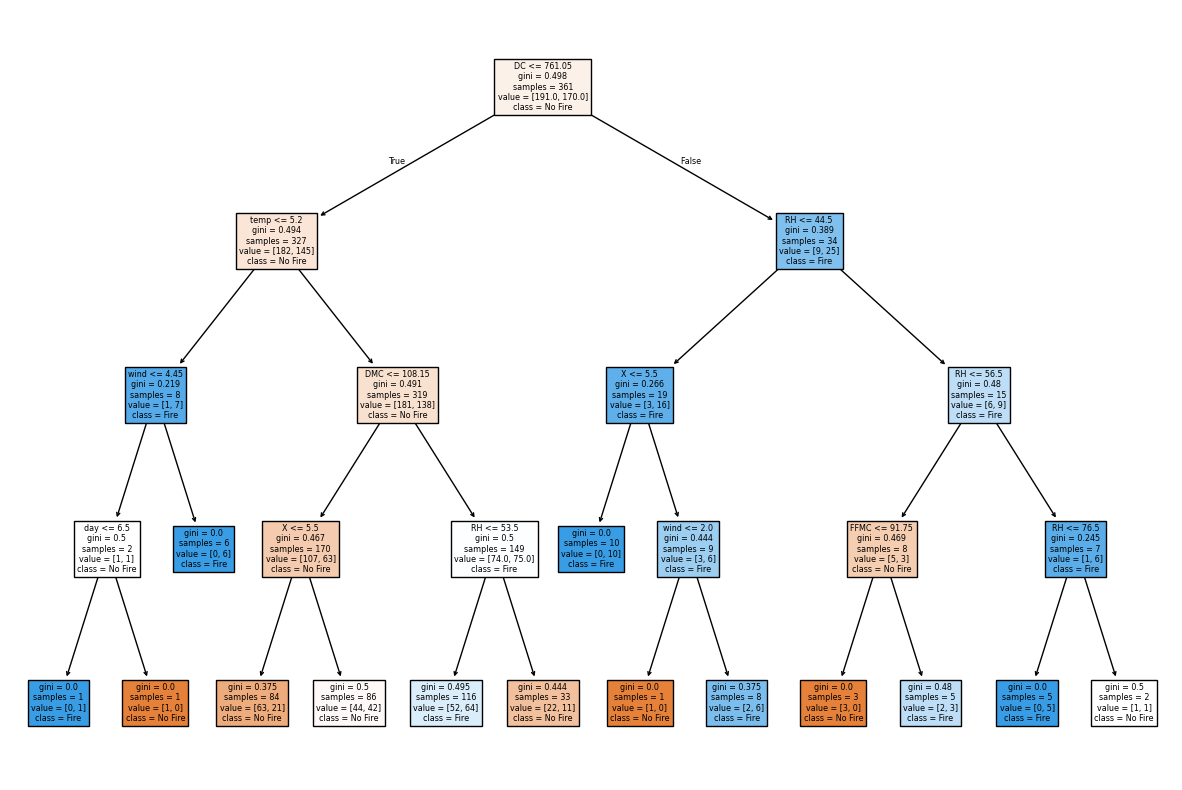

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Crear y entrenar árbol
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train)

# Predecir en test
y_pred_tree = clf.predict(X_test)

# Resultados
print("Reporte de clasificación - Árbol de Decisión:")
print(classification_report(y_test, y_pred_tree))

print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred_tree))

# Visualizar árbol
plt.figure(figsize=(15,10))
tree.plot_tree(clf, feature_names=X.columns, class_names=['No Fire', 'Fire'], filled=True)
plt.show()


#### Modelo 3. Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier

# Crear modelo con 100 árboles
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar
rf.fit(X_train, y_train)

# Predecir
y_pred_rf = rf.predict(X_test)

# Evaluar
from sklearn.metrics import classification_report, confusion_matrix

print("Reporte de clasificación - Random Forest:")
print(classification_report(y_test, y_pred_rf))

print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred_rf))


Reporte de clasificación - Random Forest:
              precision    recall  f1-score   support

           0       0.59      0.59      0.59        83
           1       0.53      0.53      0.53        73

    accuracy                           0.56       156
   macro avg       0.56      0.56      0.56       156
weighted avg       0.56      0.56      0.56       156

Matriz de confusión:
[[49 34]
 [34 39]]


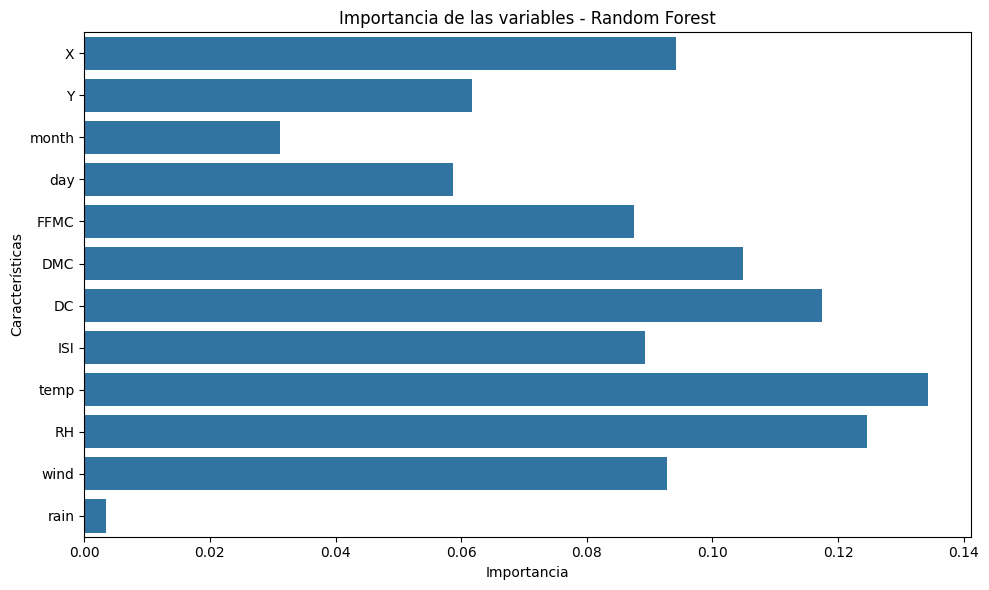

In [36]:
# Puedo ver qué variables son más relevantes para el modelo:

# Importancia de las variables
importances = rf.feature_importances_
features = X.columns

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title("Importancia de las variables - Random Forest")
plt.xlabel("Importancia")
plt.ylabel("Características")
plt.tight_layout()
plt.show()


#### Mejoramiento y optimizacion de Random Forest

Uso "GridSearchCV" que es un herramienta de scikit-learn que prueba
multiples combinaciones de hiperparametros y elige la mejor combinacion
segun la metrica

Tuning de Random Forest con GridSearchCV

Paso 1: Importar lo necesario

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

Paso 2: Definir el modelo base y los hiperparámetros a probar

Voy a probar distintas combinaciones:

In [38]:
# Modelo base
rf_base = RandomForestClassifier(random_state=42)

# Parámetros a probar
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

Paso 3: Ejecutar GridSearchCV

In [39]:
# GridSearchCV con validación cruzada de 5 partes
grid_search = GridSearchCV(
    estimator=rf_base,
    param_grid=param_grid,
    cv=5,
    scoring='f1',  # usamos F1 para balancear precisión y recall
    n_jobs=-1,     # usa todos los núcleos disponibles
    verbose=2
)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='f1', verbose=2)


Paso 4: Ver los mejores parámetros y resultados

In [40]:
# Mostrar los mejores parámetros encontrados
print("Mejores parámetros encontrados:")
print(grid_search.best_params_)

# Evaluar en test
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)

# Reporte
from sklearn.metrics import classification_report, confusion_matrix
print("Reporte de clasificación - Mejor Random Forest:")
print(classification_report(y_test, y_pred_best))
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred_best))

Mejores parámetros encontrados:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Reporte de clasificación - Mejor Random Forest:
              precision    recall  f1-score   support

           0       0.57      0.58      0.57        83
           1       0.51      0.51      0.51        73

    accuracy                           0.54       156
   macro avg       0.54      0.54      0.54       156
weighted avg       0.54      0.54      0.54       156

Matriz de confusión:
[[48 35]
 [36 37]]


#### ¿Qué estoy logrando acá?

- Pruebo automáticamente 108 combinaciones de hiperparámetros.

- Elijo el mejor modelo según la F1-score, que es más justa si tenés clases desbalanceadas.

- Comparo el rendimiento del modelo optimizado vs. el modelo por defecto.


 

#### Interpretación de los resultados de la Optimización de Random Forest

1. Mejores hiperparámetros encontrados:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}

Esto significa que el mejor modelo según F1-score es uno con:

- 50 árboles (n_estimators)

- Sin límite de profundidad (max_depth=None) → deja que los árboles crezcan todo lo que quieran

- 10 ejemplos mínimos para dividir un nodo (min_samples_split)

- 1 ejemplo mínimo por hoja (min_samples_leaf)

- En general, este es un modelo que permite árboles bastante complejos, pero restringe la división a nodos con más datos.

2. Resultados del modelo optimizado:

Accuracy: 54%
Precision: 0.57 (clase 0), 0.51 (clase 1)
Recall:    0.58 (clase 0), 0.51 (clase 1)
F1:        0.57 (clase 0), 0.51 (clase 1)


Y la matriz de confusión:

[[48 35]  ← Clase 0: 48 aciertos, 35 falsos positivos
 [36 37]] ← Clase 1: 37 aciertos, 36 falsos negativos

3. Conclusiones de la optimización:

* El modelo mejoró muy levemente o no mejoró respecto al árbol de decisión original.

- El rendimiento se mantiene cercano al azar (~50-55%), lo que indica que:

- Las variables disponibles no permiten distinguir claramente entre incendios y no incendios.

- Puede haber mucha superposición en los datos, o información faltante clave (por ejemplo: tipo de vegetación, topografía, viento real, etc.).

- El modelo está teniendo dificultades para detectar incendios reales (recall = 0.51), lo cual es un problema si queremos usarlo en contextos de prevención.


Modelo 4. XGBoost

In [41]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Crear modelo con configuración básica
xgb = XGBClassifier(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# Entrenar
xgb.fit(X_train, y_train)

# Predecir
y_pred_xgb = xgb.predict(X_test)

# Evaluar
print("Reporte de clasificación - XGBoost:")
print(classification_report(y_test, y_pred_xgb))

print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred_xgb))


Reporte de clasificación - XGBoost:
              precision    recall  f1-score   support

           0       0.53      0.52      0.52        83
           1       0.47      0.48      0.47        73

    accuracy                           0.50       156
   macro avg       0.50      0.50      0.50       156
weighted avg       0.50      0.50      0.50       156

Matriz de confusión:
[[43 40]
 [38 35]]


C:\Users\flore\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\xgboost\training.py:183: UserWarning: [16:58:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Evaluación modelo XGBoost

Este modelo no está rindiendo mejor que los anteriores, incluso después de 
usar XGBoost. 

¿Qué significa esto?

Posibles causas del mal rendimiento 

1. Variables poco informativas:
Las variables actuales (temperatura, humedad, viento, etc.) no parecen contener 
señales suficientes para distinguir incendios de no incendios.

2. Ruido en los datos:
La variable fire está basada en si area > 0, pero quizás muchos incendios tienen 
área pequeña o los datos tienen errores.

3. Relaciones no lineales o no detectables
Es posible que los incendios dependan de cosas que no están en el dataset: vegetación, 
densidad forestal, antecedentes, topografía, precipitaciones acumuladas, etc.

### 10. Evaluación de los modelos

- Reportes de clasificación

- Matrices de confusión

- Importancia de variables

(acá incluir gráficos de importancia de features)

1. Reportes de clasificación

In [46]:
from sklearn.metrics import classification_report

# y_test: valores reales
# y_pred: predicciones del modelo
print(classification_report(y_test, y_pred))


NameError: name 'y_pred' is not defined

2.  Matrices de confusión

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap="Blues")
plt.title("Matriz de confusión")
plt.show()

3. Importancia de variables (para Random Forest o modelos de árbol)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
xgb.feature_importances_  # si querés ver los valores exactos

plt.barh(X.columns, xgb.feature_importances_)
plt.title("Importancia de las variables - XGBoost")
plt.xlabel("Importancia")
plt.show()

In [ ]:
# Suponiendo que usé un modelo RandomForestClassifier
importances = model.feature_importances_
feature_names = X.columns

feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feat_imp.values, y=feat_imp.index, palette="viridis")
plt.title("Importancia de variables")
plt.xlabel("Importancia")
plt.ylabel("Características")
plt.tight_layout()
plt.show()

¿Qué esperar?

XGBoost suele:

- Ser más robusto que un árbol o un random forest "crudo".

- Tener mejor recall en la clase minoritaria.

- Aprender combinaciones no lineales entre variables.


---

### ✅ Conclusiones Generales

Este análisis demuestra cómo variables climáticas pueden ser útiles para predecir incendios forestales, permitiendo tomar decisiones más informadas en prevención y respuesta rápida.

Para este conjunto de datos:

- Los modelos presentan una precisión limitada (~50–55%)

- Las variables actuales no capturan bien los factores que determinan un incendio

- Siguientes pasos: nuevas variables, otros modelos, más datos

**Recomendaciones**:
- Utilizar este tipo de modelo para generar alertas tempranas.
- Complementar el análisis con datos de tipo de vegetación o intervención humana.
- Implementar sistemas de monitoreo automático en zonas críticas.

**Próximos pasos**:
- Ajustar hiperparámetros y realizar validación cruzada.
- Incorporar predicción geoespacial.
- Desarrollar una app interactiva para visualizar predicciones en tiempo real.

---
